In [1]:
import warnings
import pandas as p
import matplotlib.pyplot as plt
import seaborn as s
from sklearn import *
from wordcloud import WordCloud
import nltk
from nltk import *
from tqdm import tqdm
import numpy as np
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix

In [2]:
d=p.read_csv("flipkart_data.csv")

In [3]:
d

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5
...,...,...
9971,GoodREAD MORE,5
9972,Everything is amazimg but the built is very li...,5
9973,GoodREAD MORE,5
9974,Best headphone i have ever used....READ MORE,5


In [4]:
d.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [5]:
d.tail()

,review,rating
9971,GoodREAD MORE,5
9972,Everything is amazimg but the built is very li...,5
9973,GoodREAD MORE,5
9974,Best headphone i have ever used....READ MORE,5
9975,NiceREAD MORE,5


In [6]:
d.shape

(9976, 2)

In [7]:
d.size

19952

In [8]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9976 entries, 0 to 9975
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  9976 non-null   object
 1   rating  9976 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 156.0+ KB


In [9]:
d.describe()

,rating
count,9976.000000
mean,4.215417
std,1.167911
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [10]:
d.columns

Index(['review', 'rating'], dtype='object')

In [11]:
d.isna().any()

review    False
rating    False
dtype: bool

In [12]:
d.isnull().sum()

review    0
rating    0
dtype: int64

In [13]:
d.count()

review    9976
rating    9976
dtype: int64

In [14]:
d.value_counts()

review                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         rating
GoodREAD MORE                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [15]:
d['rating']

0       5
1       5
2       4
3       5
4       5
       ..
9971    5
9972    5
9973    5
9974    5
9975    5
Name: rating, Length: 9976, dtype: int64

In [16]:
d['review']

0       It was nice produt. I like it's design a lot. ...
1       awesome sound....very pretty to see this nd th...
2       awesome sound quality. pros 7-8 hrs of battery...
3       I think it is such a good product not only as ...
4       awesome bass sound quality very good bettary l...
                              ...                        
9971                                        GoodREAD MORE
9972    Everything is amazimg but the built is very li...
9973                                        GoodREAD MORE
9974         Best headphone i have ever used....READ MORE
9975                                        NiceREAD MORE
Name: review, Length: 9976, dtype: object

In [17]:
d['rating'].unique()

array([5, 4, 1, 3, 2], dtype=int64)

In [18]:
d['review'].unique()

array(["It was nice produt. I like it's design a lot.  It's easy to carry. And.   Looked stylish.READ MORE",
       'awesome sound....very pretty to see this nd the sound quality was too good I wish to take this product loved this product 😍😍😍READ MORE',
       'awesome sound quality. pros 7-8 hrs of battery life (including 45 mins approx call time)Awesome sound output. Bass and treble are really very clear without equaliser. With equaliser, sound wary depends on the handset sound quality.Weightless to carry and in head tooMic is good, but in traffic it is not too good (3.25/5)3.5mm Option is really important to mention. Really expecting other leading brands to implement this.ConsVery tight in ears. adjusters are ok .. this ll be very tight...READ MORE',
       ..., "It's tight and not more comfortableREAD MORE",
       'Everything is amazimg but the built is very light..READ MORE',
       'Best headphone i have ever used....READ MORE'], dtype=object)

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<AxesSubplot: xlabel='rating', ylabel='count'>

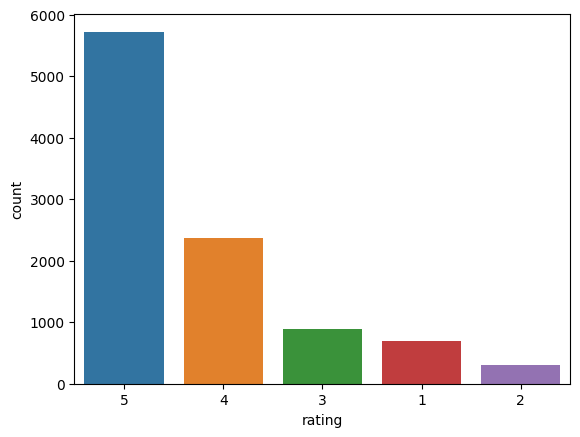

In [20]:
s.countplot(data=d,order=d.rating.value_counts().index, x='rating')

In [21]:
for c in d.columns:
    if d[c].isnull().sum()>0:
        d[c]=d[c].fillna(d[c].mean())
d.isnull().sum().sum()

0

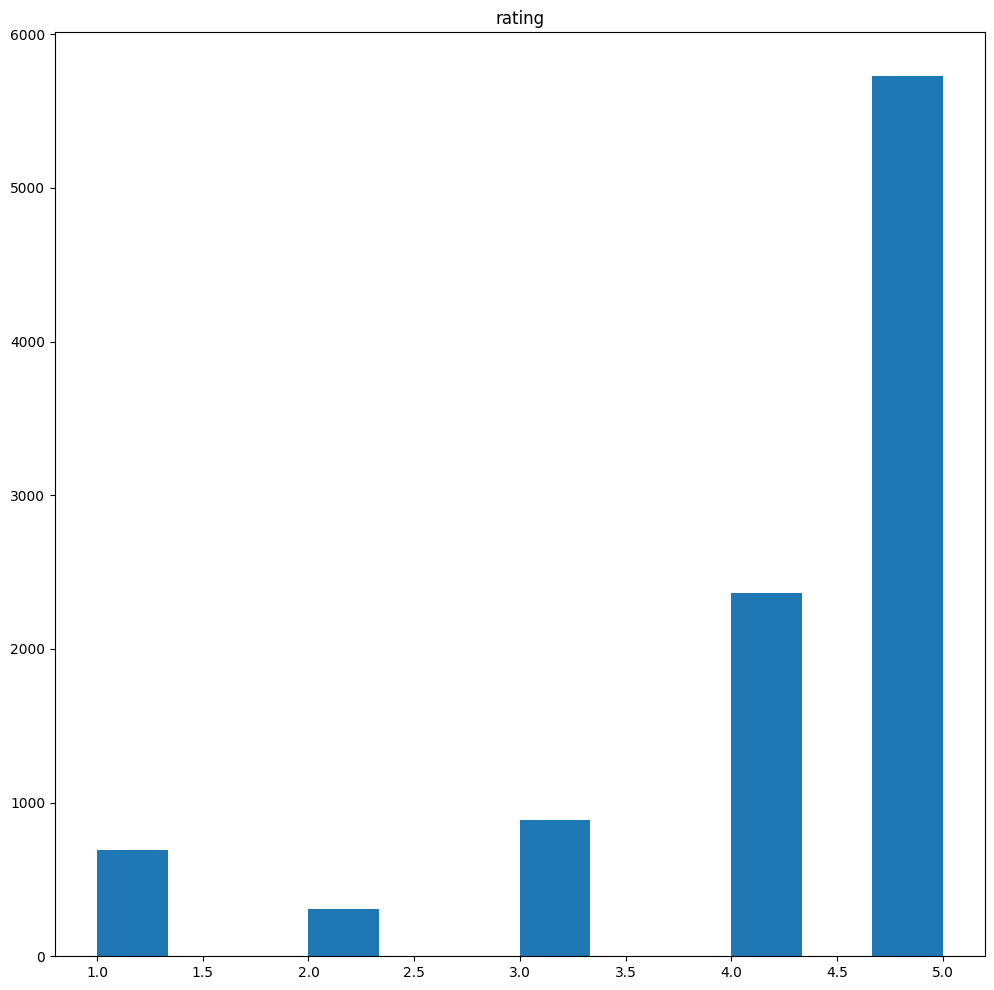

In [22]:
d.hist(bins=12,grid=False,figsize=(12,12))
plt.show()

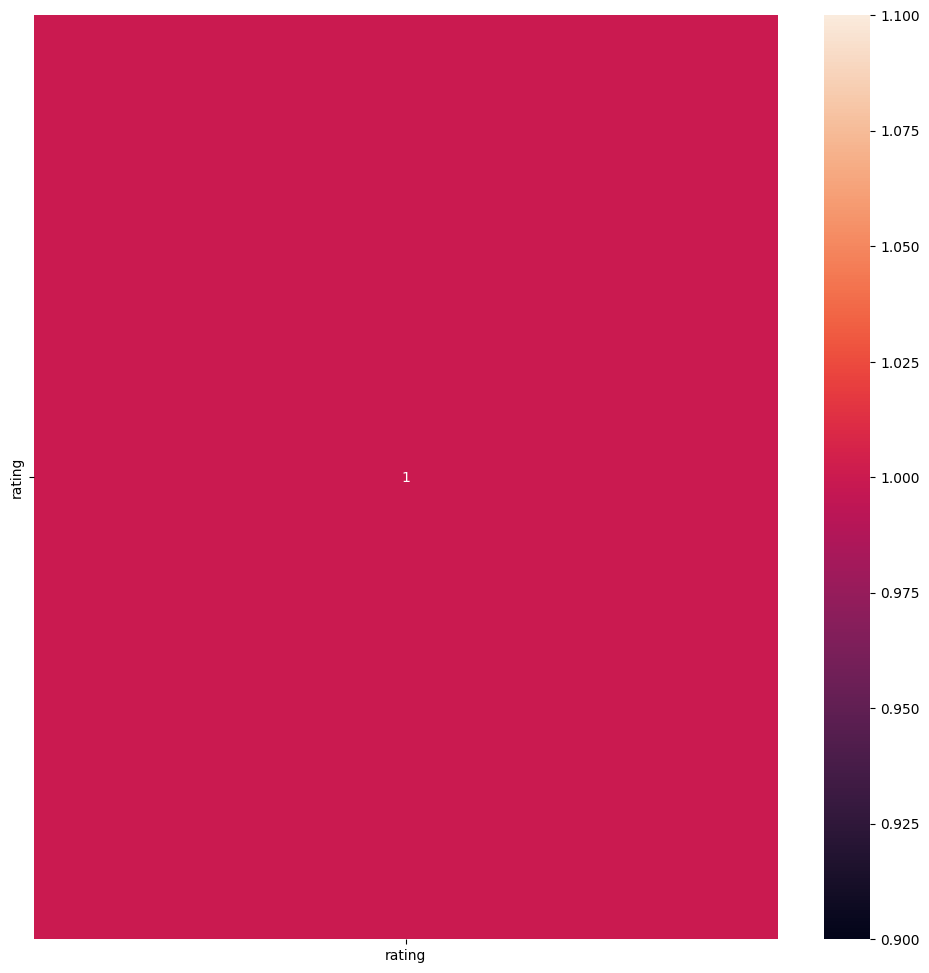

In [23]:
plt.figure(figsize=(12,12))
s.heatmap(d.corr(),annot=True,cbar=True)
plt.show()

In [24]:
neg_index=[]
for i in range(len(d['rating'])):
    if d['rating'][i] >=5:
        neg_index.append(1)
    else:
        neg_index.append(0)
d['label']=neg_index

In [25]:
d['label']

0       1
1       1
2       0
3       1
4       1
       ..
9971    1
9972    1
9973    1
9974    1
9975    1
Name: label, Length: 9976, dtype: int64

In [26]:
from nltk import word_tokenize

In [27]:
from nltk import tokenize

In [28]:
d['label'].count()

9976

In [29]:
d['label'].value_counts()

1    5726
0    4250
Name: label, dtype: int64

In [30]:
consol=' '.join(w for w in d['review'][d['label']==1].astype(str))
wc=WordCloud(width=1500,height=900,random_state=23,max_font_size=100)


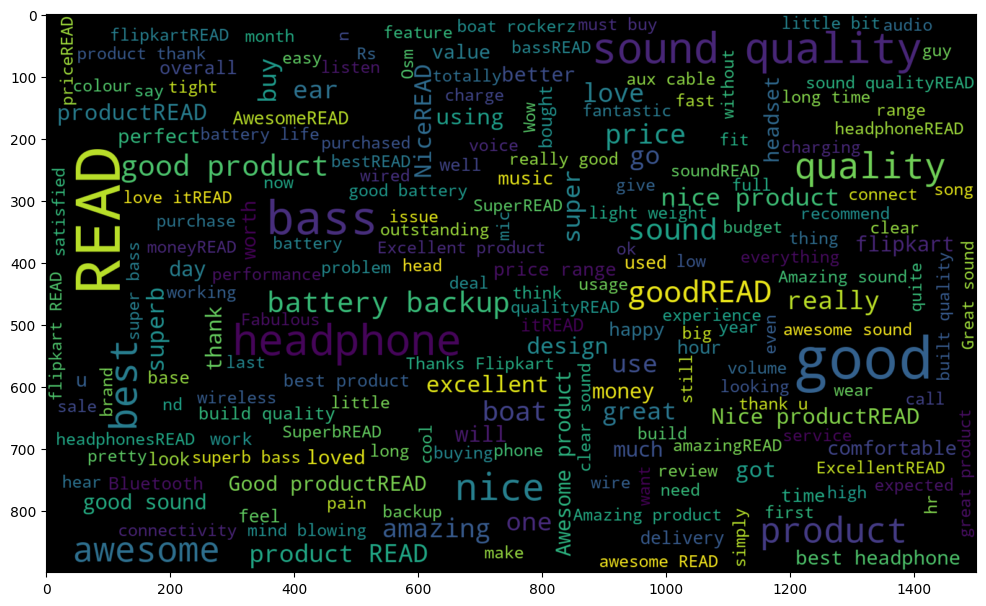

In [31]:
plt.figure(figsize=(12,12))
plt.imshow(wc.generate(consol), interpolation='bilinear')


In [32]:
CV=TfidfVectorizer(max_features=2600)
Y=CV.fit_transform(d['review']).toarray()

In [33]:
CV

TfidfVectorizer(max_features=2600)

In [34]:
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])